#### Illustrate the difference between euclidean and wasserstein barycenters by comparing the barycenters from 2 extreme distributions. Take the DAs with the most populous old and young cohorts. The euclidean barycenter is a mixture of the 2 and the barycenter is therefore composed of 2 local max, one near 75 years and another near 25, which is representative of neither real DA. On the other hand, the wasserstein barycenter has a single mode near 50 

# Libs

In [43]:

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

import numpy as np

import os
import re
import sys

import seaborn as sns
 
from collections import defaultdict
    
sys.path.append("/home/charles/Projects/BarycentersAgePyramid/Python")
sys.path.append("/home/dhw3172/projects/barycenterAgePyramid/Python")

from WassAge import *

from pathlib import Path

# Params

In [44]:
DATA_PATH = Path("." ) / ".." /".."/ "Data" 
os.listdir(DATA_PATH)

['Numpy',
 'shpLavalDAAgePyramid',
 'shpMtlDAAgePyramid',
 'shpHalifaxDAAgePyramid',
 'QuebecNeighbourhoods',
 '.ipynb_checkpoints',
 'MontrealNeighbourhoods',
 'shpCalgaryDAAgePyramid',
 'shpMontrealDAAgePyramid',
 'shpTorontoDAAgePyramid',
 'Extremal',
 'shpQuebecDAAgePyramid',
 'shpWinnipegDAAgePyramid',
 'shpVancouverDAAgePyramid',
 'shpWaterlooDAAgePyramid']

In [45]:
np.random.seed(1)

In [46]:
useApproxWass= False
approxStr = "Approximate" if useApproxWass else "Exact"  

In [73]:
#city="Montreal"
city="Quebec City"

# Data IO

## DA shp

In [74]:
dfGeoClean = normalizeCleanDfGeo( readDAShp(city=city) )

Reading neibourhoods from Quebec


In [75]:
dfGeoClean[LIST_AGE_COLS].sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
878    1.0
879    1.0
880    1.0
881    1.0
882    1.0
Length: 879, dtype: float64

In [76]:
dfGeoCleanAge = dfGeoClean[LIST_AGE_COLS]

## Neigh

In [77]:
dfNeigh = readNeighShp(city=city)

Reading neibourhoods from Quebec City


# Dist matrix

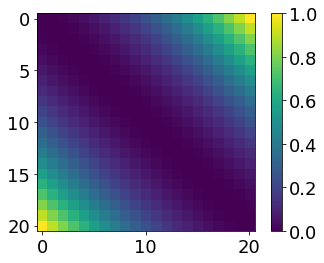

In [37]:

distMatrix = getDistanceAgeCohorts()
plt.imshow(distMatrix)
plt.colorbar()

# Wasserstein barycenter - extremal DAs

In [38]:
# approximate sol

In [39]:
bary_wassExtremes = getWassBarycenterOldYoung(dfGeoClean, distMatrix,approx= True )

Computing approximate sol:


/home/charles/Projects/BarycentersAgePyramid/Python/WassAge/Barycenters/wassersteinBarycenter.py:21: UserWarning: Warning in getWassBarycenterCityWide, the df is not (row) normalized
  warn("Warning in getWassBarycenterCityWide, the df is not (row) normalized")


In [12]:
youngestDAIdx , _ = getYoungestDA(dfGeoClean)
oldestDAIdx , _ = getOldestDA(dfGeoClean)

In [13]:
propYoung = dfGeoClean.iloc[youngestDAIdx,: ][LIST_AGE_YOUNG].sum()
propOld = dfGeoClean.iloc[oldestDAIdx,: ][LIST_AGE_OLD].sum()
propYoung, propOld

(0.6456692913385826, 0.640625)

In [14]:
# optimal lp

In [43]:
bary_wassExtremes_LP = getWassBarycenterOldYoung(dfGeoClean, distMatrix ,approx=False)

Computing optimal LP sol:


In [44]:
# euclidean barycenter - ie arithmetic average

In [45]:
dfEuclMean = getEuclideanBarycenter(dfGeoClean)

### Plot

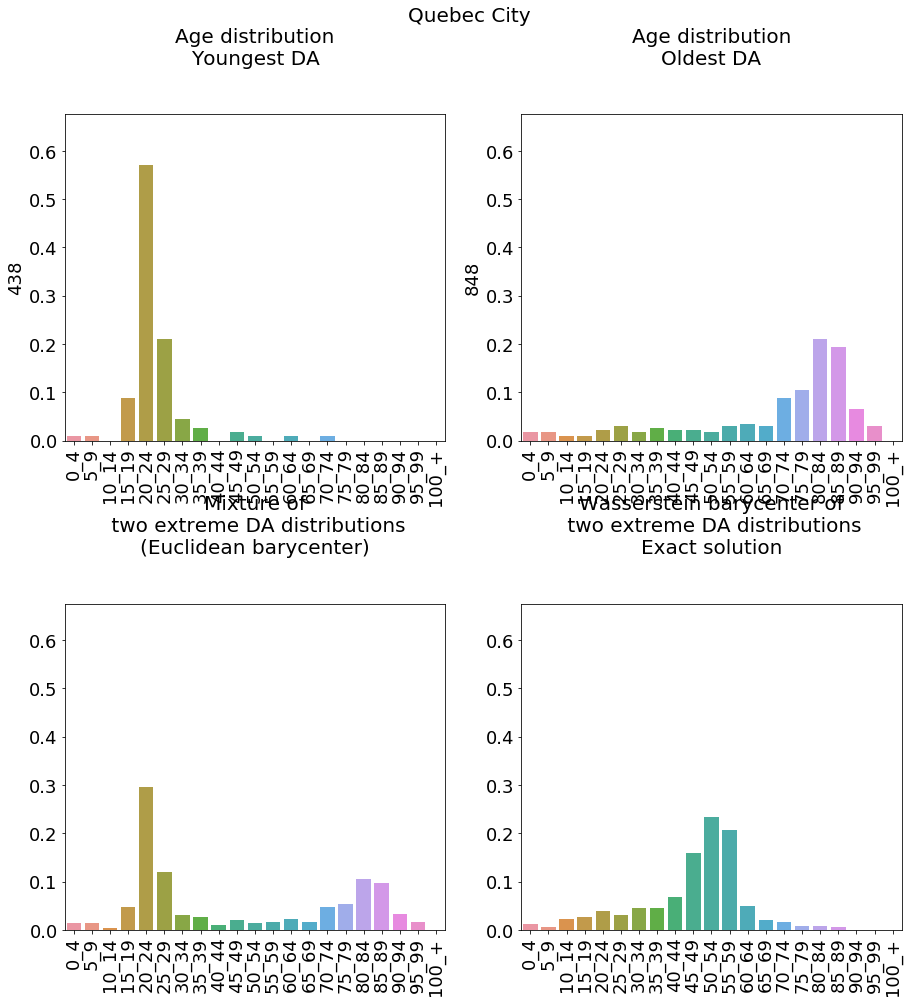

In [46]:
f=plt.figure(figsize=(15,15))
minY=max(  propYoung , propOld )

plt.subplot(2,2,1)
plt.ylim(0,minY)
ax=sns.barplot( x=dfGeoCleanAge.columns, y=dfGeoClean.iloc[youngestDAIdx,:][LIST_AGE_COLS])
ax.set_title("Age distribution\nYoungest DA\n\n",fontsize=20)
_ = ax.set_xticklabels(labels= dfGeoCleanAge.columns, rotation=90)


plt.subplot(2,2,2)
plt.ylim(0,minY)
ax=sns.barplot( x=dfGeoCleanAge.columns, y=dfGeoClean.iloc[oldestDAIdx,:][LIST_AGE_COLS])
ax.set_title("Age distribution\nOldest DA\n\n",fontsize=20)
_ = ax.set_xticklabels(labels= dfGeoCleanAge.columns, rotation=90)


plt.subplot(2,2,3)
plt.ylim(0,minY)
ax=sns.barplot( x=dfGeoCleanAge.columns, y=dfGeoClean.iloc[ [oldestDAIdx,youngestDAIdx], : ][LIST_AGE_COLS].mean(axis=0).values)
ax.set_title("Mixture of\n two extreme DA distributions\n(Euclidean barycenter)\n\n",fontsize=20)
_ = ax.set_xticklabels(labels= dfGeoCleanAge.columns, rotation=90)


plt.subplot(2,2,4)
plt.ylim(0,minY)
ax=sns.barplot( x=dfGeoCleanAge.columns, y=bary_wassExtremes_LP)
ax.set_title(f"Wasserstein barycenter of\n two extreme DA distributions\n{approxStr} solution\n\n",fontsize=20)
_ = ax.set_xticklabels(labels= dfGeoCleanAge.columns, rotation=90)


plt.subplots_adjust(hspace=0.5)



_ = f.suptitle(f"{city}",fontsize=20)

f.savefig( DATA_PATH /  ".."/ "Figures" / "Extremal" / f"qcHistDAExtreme_{city}.png")

## Compare optimal LP and approximate solution

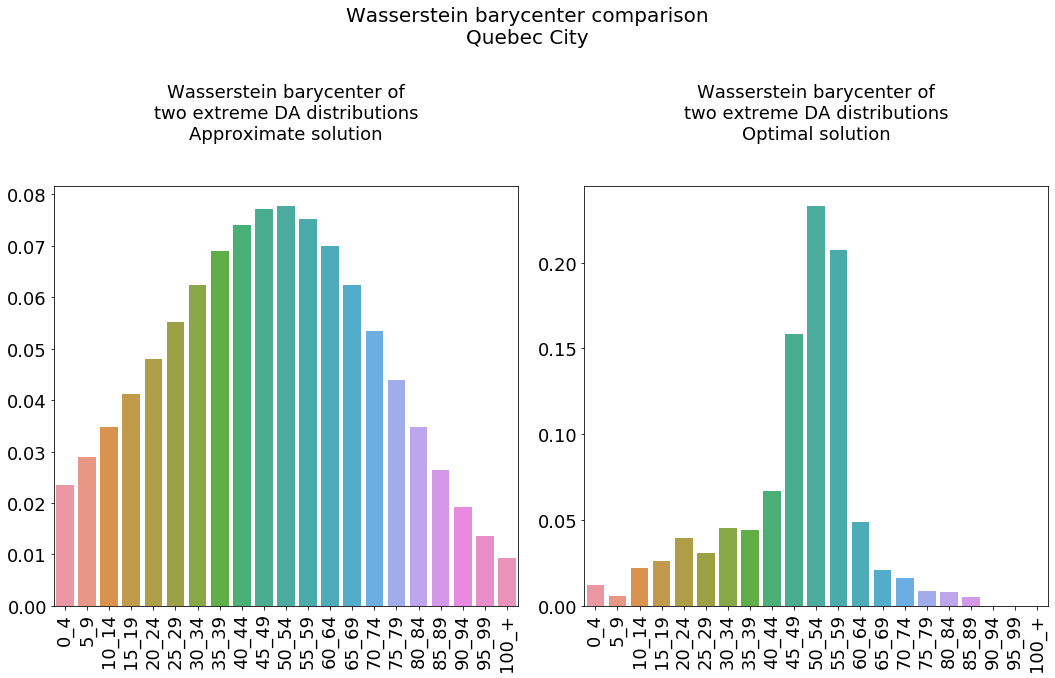

In [47]:
f=plt.figure(figsize=(15,10))


plt.subplot(1,2,1)
ax=sns.barplot( x=dfEuclMean.columns, y=bary_wassExtremes)
ax.set_title("Wasserstein barycenter of\ntwo extreme DA distributions\nApproximate solution\n\n",fontsize=18)
_ = ax.set_xticklabels(labels= dfEuclMean.columns, rotation=90)

plt.subplot(1,2,2)
ax=sns.barplot( x=dfEuclMean.columns, y=bary_wassExtremes_LP)
ax.set_title("Wasserstein barycenter of\ntwo extreme DA distributions\nOptimal solution\n\n",fontsize=18)
_ = ax.set_xticklabels(labels= dfEuclMean.columns, rotation=90)

f.suptitle(f"Wasserstein barycenter comparison\n{city}",fontsize=20)

plt.tight_layout ( rect=[0, 0.03, 1, 0.90] )

f.savefig( DATA_PATH /  ".."/ "Figures" / "Extremal" / "qcWassExtremeApproxVsOptimal.png")

## Visualize wasserstein distance between barycenter and different (extreme) DA age distributions

In [48]:
#useApproxWass= True
#approxStr = "Approximate" if useApproxWass else "Exact"  
bary_wass= bary_wassExtremes_LP if useApproxWass else dfEuclMean.values.ravel()

In [49]:
listOptTransport=defaultdict(np.array)
listTitles = defaultdict(str)
listCosts= defaultdict(float)

listOptTransport[0] =ot.emd(bary_wass,
                      np.ascontiguousarray(dfGeoCleanAge.iloc[youngestDAIdx,:].values),
                       distMatrix)

# Matrix norm of hadamard (element wise) product
listCosts[0]= np.sum( listOptTransport[0][:]* distMatrix[:]) 
listTitles[0] = f"Youngest DA\nWasserstein barycenter\nTotal Wasserstein distance: {listCosts[0]:.2f}"



listOptTransport[1] = ot.emd(bary_wass,
                      np.ascontiguousarray(dfGeoCleanAge.iloc[oldestDAIdx,:].values),
                       distMatrix)

listCosts[1]= np.sum( listOptTransport[1][:]* distMatrix[:]) 
listTitles[1] = f"Oldest DA\nWasserstein barycenter\nTotal Wasserstein distance: {listCosts[1]:.2f}"




listOptTransport[2] = ot.emd(bary_wass,
                  dfGeoCleanAge.iloc[ [oldestDAIdx,youngestDAIdx], : ].mean(axis=0).values,
                   distMatrix)
listCosts[2] = np.sum( listOptTransport[2][:]* distMatrix[:])
listTitles[2] = f"Mixture\nWasserstein barycenter\nTotal Wasserstein distance: {listCosts[2]:.2f}"


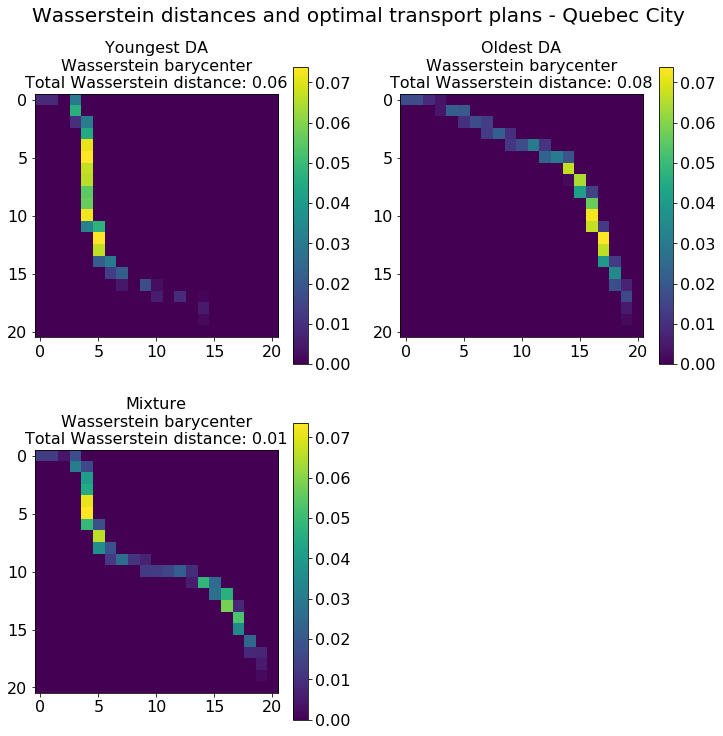

In [50]:

rc={'axes.labelsize': 16, 'font.size': 16, 'legend.fontsize': 16, 'axes.titlesize': 16 }
sns.set_context(rc=rc)


f=plt.figure(figsize=(12,12)) 
 
for i in range(3): 
    ax=plt.subplot(2,2,i+1)
    plt.imshow( listOptTransport[i] )
    ax.set_title(listTitles[i] )
    plt.colorbar()

_ = plt.suptitle(f"Wasserstein distances and optimal transport plans - {city}", fontsize=20, y=0.95)

#plt.tight_layout()

f.savefig( DATA_PATH /".."/ "Figures" / "Extremal" / f"qcOptTransportDAExtreme_{approxStr}_{city}.png")